In [1]:
# Code to load in some of the RHESSI microflare statistics results from Hannah et al. 2008
# https://doi.org/10.1086/529012
# Analysis done in sswidl and results combined together in 
# rhessi_weeflares_results.pro producing wee_all.genx
# This genx is loaded in and then recreate some of the plots from the paper
# 
# 04-May-2023   IGH


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
from sunpy.io.special import read_genx

import warnings
warnings.simplefilter('ignore')

matplotlib.rcParams['font.size']=16

In [3]:
# Load in the sswidl genx make by rhessi_weeflares_results.ipynb
res=read_genx('wee_all.genx')

# And extract out of the dictionary

# OSPEX fit of f_vth + bpow
tmk=res["SAVEGEN0"]["TMK"]
em=res["SAVEGEN0"]["EM"]
norm=res["SAVEGEN0"]["NORM"]
eb=res["SAVEGEN0"]["EB"]
g2=res["SAVEGEN0"]["G2"]
# Estimated low energy cutoff from bpow fit
ec=res["SAVEGEN0"]["EC"]
# Photon flux from model parameters
ph12=res["SAVEGEN0"]["PH12"]
ph4_8=res["SAVEGEN0"]["PH4_8"]
# GOES pre-flare subtracted flux, T and EM
gfbs=res["SAVEGEN0"]["GFLX_BS"]
gtmk=res["SAVEGEN0"]["GTMK"]
gem=res["SAVEGEN0"]["GEM"]
# Fit loop to 4-8 keV -> volume, 4-8 keV flux and x,y centroid
vol=res["SAVEGEN0"]["VOL"]
v4_8=res["SAVEGEN0"]["VFLX4_8"]
vcx=res["SAVEGEN0"]["VX"]
vcy=res["SAVEGEN0"]["VY"]
# Thermal and Non-thermal energy in erg
eng_th=res["SAVEGEN0"]["ENG_TH"]
eng_nn=res["SAVEGEN0"]["ENG_NN"]
# Events with "good" fits (th, nn, th+gs, nn+gs)
idgdth=res["SAVEGEN0"]["IDGDTH"]
idgdnn=res["SAVEGEN0"]["IDGDNN"]
idgsgdth=res["SAVEGEN0"]["IDGSGDTH"]
idgsgdnn=res["SAVEGEN0"]["IDGSGDNN"]

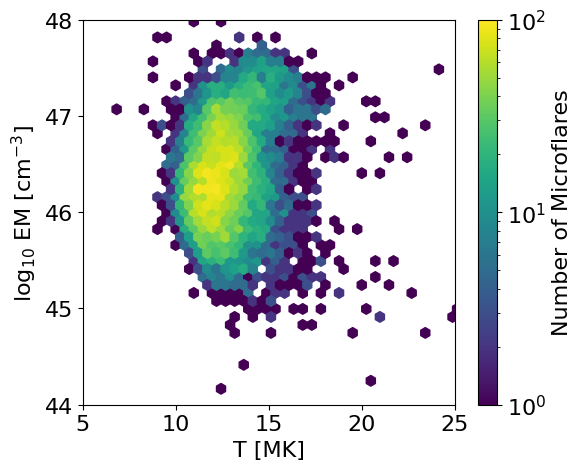

In [4]:
# Like Fig 13 in Hannah et al. 2008
fig,ax=plt.subplots(figsize=(6,5))
plt.hexbin(tmk[idgdth],np.log10(em[idgdth]),gridsize=50,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
ax.set_xlabel('T [MK]')
ax.set_ylabel('log$_{10}$ EM [cm$^{-3}$]')
ax.set_xlim([5,25])
ax.set_ylim([44,48])
plt.colorbar(label='Number of Microflares')
plt.locator_params(axis='both', nbins=4)
plt.show()

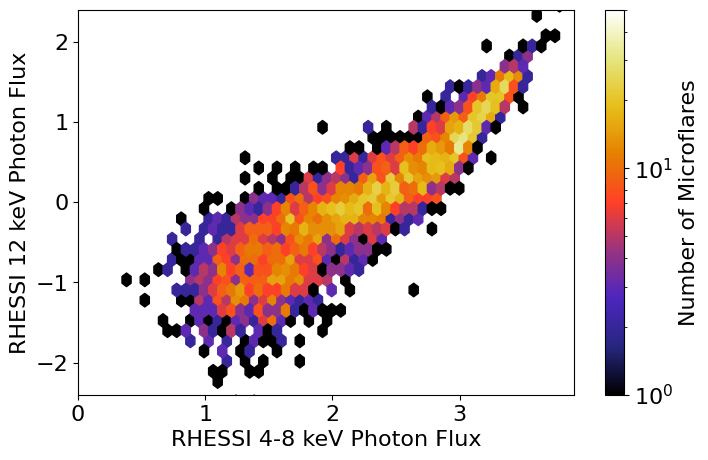

In [5]:
#  Like Fig 17 in Hannah et al. 2008
fig,ax=plt.subplots(figsize=(8,5))
plt.hexbin(np.log10(ph4_8[idgdnn]),np.log10(ph12[idgdnn]),gridsize=50,cmap='CMRmap',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=50))
ax.set_xlabel('RHESSI 4-8 keV Photon Flux')
ax.set_ylabel('RHESSI 12 keV Photon Flux')
ax.set_xlim([0,3.9])
ax.set_ylim([-2.4,2.4])
plt.colorbar(label='Number of Microflares')
plt.show()

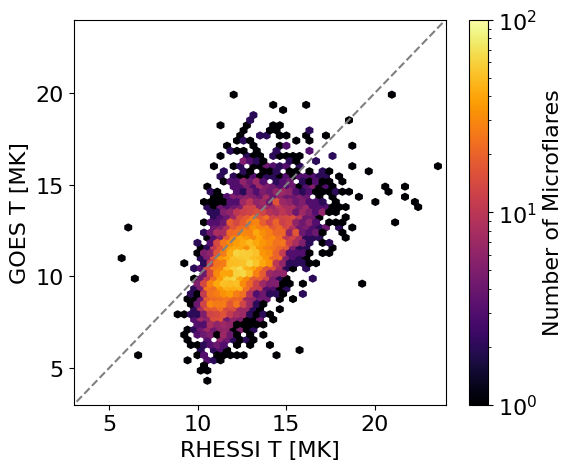

In [6]:
# Like Fig 14 in Hannah et al. 2008 
# Distribution of 4-8 keV photon flux from the loop fit to the visibilities
fig,ax=plt.subplots(figsize=(6,5))
plt.hexbin(tmk[idgsgdth],gtmk[idgsgdth],gridsize=50,cmap='inferno',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=1e2))
ax.set_xlabel('RHESSI T [MK]')
ax.set_ylabel('GOES T [MK]')
ax.set_xlim([3,24])
ax.set_ylim([3,24])
plt.colorbar(label='Number of Microflares')
plt.plot([1,50],[1,50],"--",color='grey')
plt.show()

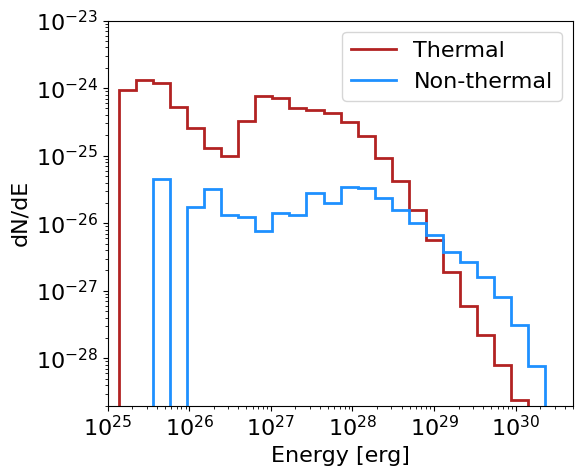

In [7]:
#  Plot the thermal energy distriubtion
num, ebins=np.histogram(np.log10(eng_th[idgdth]),bins=25)
numnn, ebins=np.histogram(np.log10(eng_nn[idgdnn]),bins=ebins)
de=[10**ebins[i+1]-10**ebins[i] for i in range(len(ebins)-1)]
fig,ax=plt.subplots(figsize=(6,5))
plt.stairs(num/de,10**ebins,color='firebrick',lw=2,label='Thermal')
plt.stairs(numnn/de,10**ebins,color='dodgerblue',lw=2,label='Non-thermal')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Energy [erg]')
ax.set_ylabel('dN/dE')
ax.set_xlim([1e25,5e30])
ax.set_ylim([2e-29,1e-23])
ax.xaxis.set_major_locator(mticker.LogLocator(numticks=999))
ax.xaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
plt.legend(loc=1)
plt.show()